# 🌟图像识别之cifar10数据集

CIFAR-10数据集包含10个类别的60000个32x32彩色图像，每个类别6000个图像，有50000张训练图像和10000张测试图像。

数据集分为五个训练批次和一个测试批次，每个批次具有10000张图像。测试批次包含每个类别中恰好1000个随机选择的图像。

训练批次按随机顺序包含其余图像，但是某些训练批次可能包含比另一类更多的图像。


## 1.导入所需要的库和模块

In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']     # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False    # 解决图片显示为负号'-'显示为方块的问题
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras import Model
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2.导入数据集

In [2]:
'''加载数据集'''

np.set_printoptions(threshold=np.inf)
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
'''输出训练集数据和测试集数据的维度大小'''

print(f"Training data shape:{x_train.shape}")
print(f"Training label shape:{y_train.shape}")
print(f"Test data shape:{x_test.shape}")
print(f"Test label shape:{y_test.shape}")

Training data shape:(50000, 32, 32, 3)
Training label shape:(50000, 1)
Test data shape:(10000, 32, 32, 3)
Test label shape:(10000, 1)


## 3.数据可视化和预处理

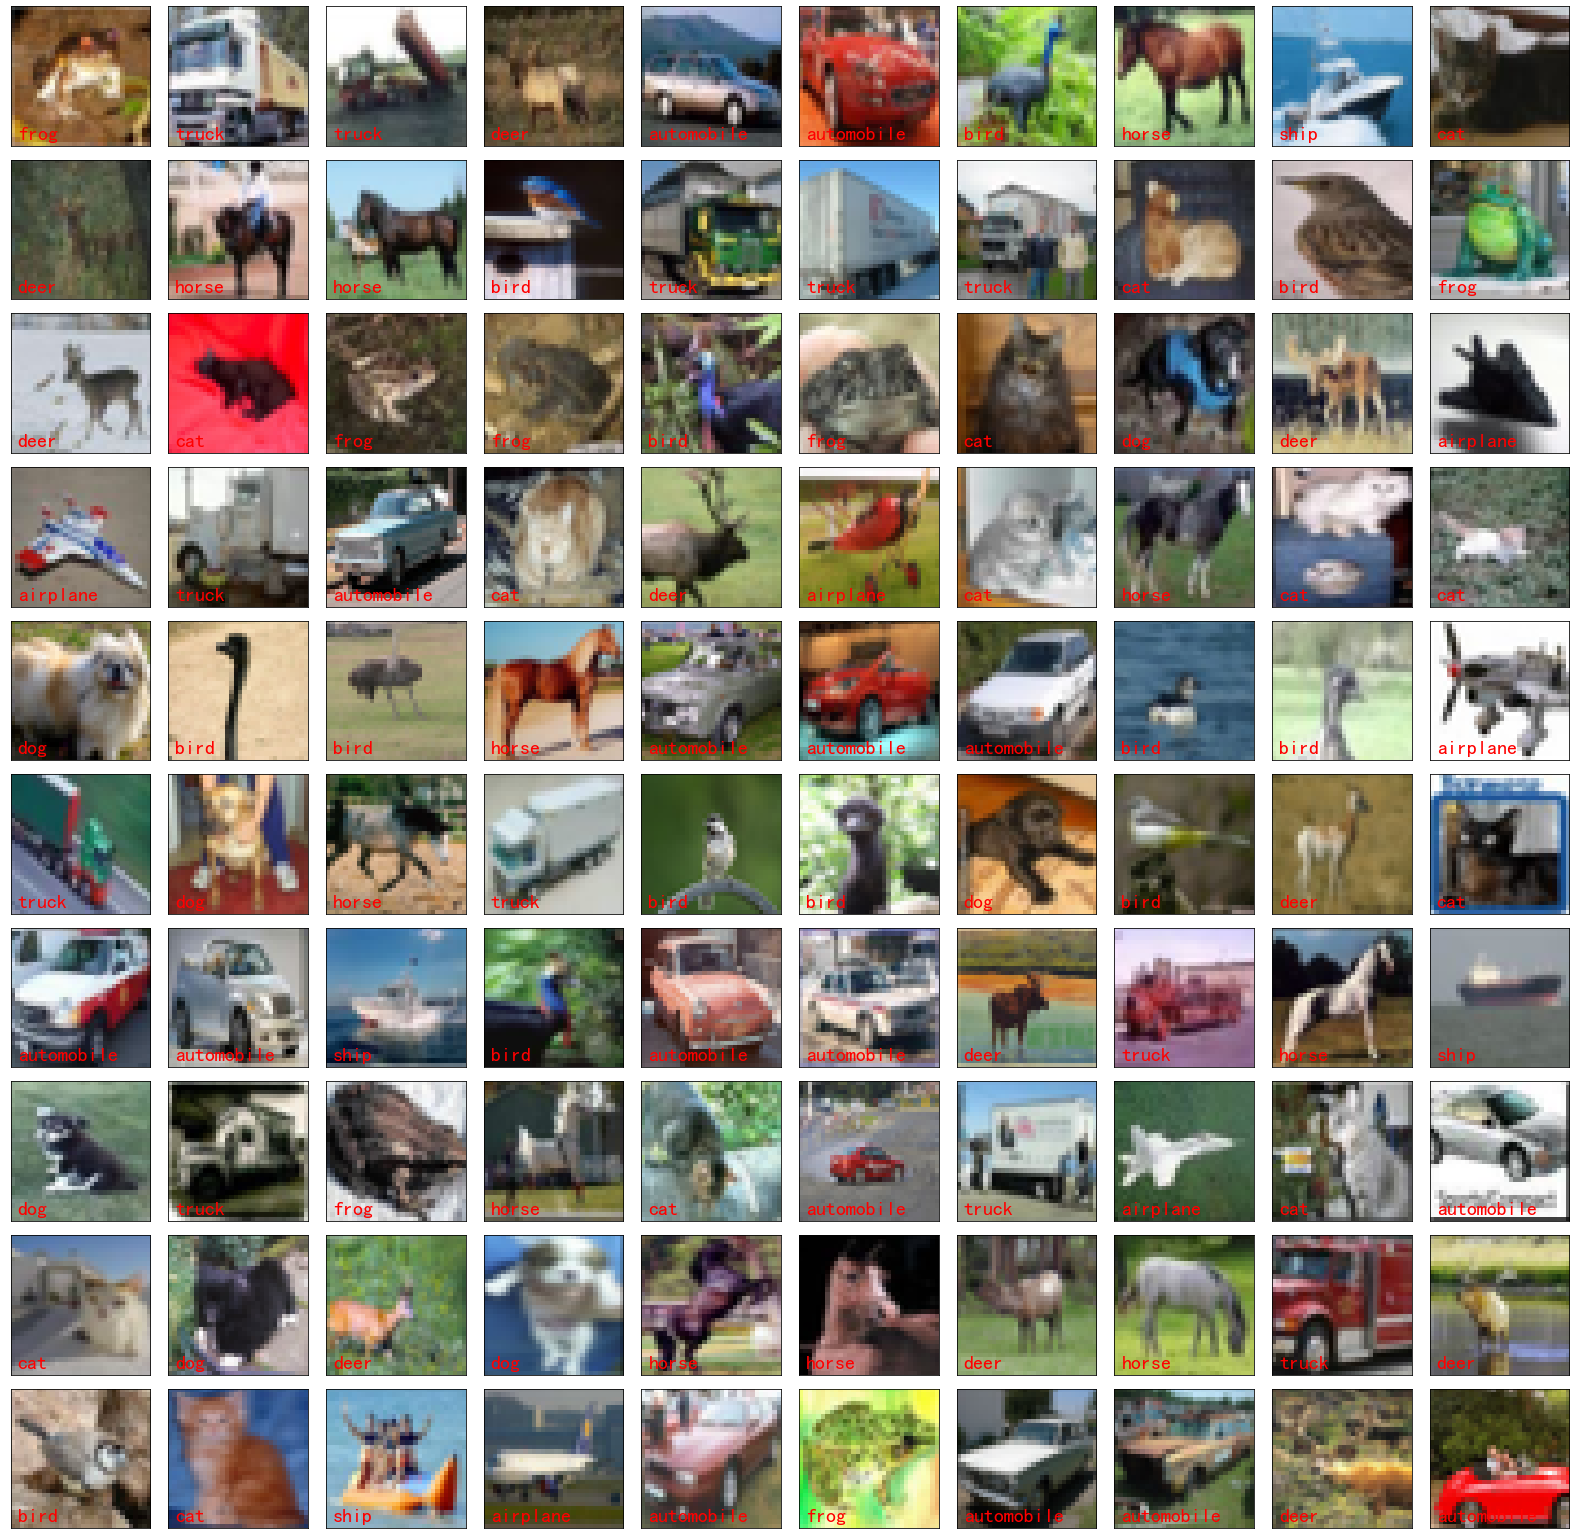

In [4]:
'''可视化数据集'''
def get_img(i):
    image = x_train[i]
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    img = cv2.merge([r,g,b])
    return img
label = {               # 添加类别标签
      0:'airplane',
      1:'automobile',
      2:'bird',
      3:'cat',
      4:'deer',
      5:'dog',
      6:'frog',
      7:'horse',
      8:'ship',
      9:'truck'
      }

'''绘制手写数字图像'''
fig,axes = plt.subplots(10,10, figsize=(28, 28),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(get_img(i), interpolation='nearest')
    ax.text(0.05, 0.05, label[y_train[i][0]],transform=ax.transAxes, color='red', fontsize=20)
plt.show()

In [5]:
'''数据预处理'''

print(f"处理之前的图像信息：{x_train[0][0][0]}")             # 查看图像信息
x_train, x_test = x_train / 255.0, x_test / 255.0        # 对数据进行标准化
print(f"处理之后的图像信息：{x_train[0][0][0]}")            # 标准化后图像的信息

处理之前的图像信息：[59 62 63]
处理之后的图像信息：[0.23137255 0.24313725 0.24705882]


## 4.不同模型进行图像识别

### 4.1 LeNet

![](https://ss1.bdstatic.com/70cFuXSh_Q1YnxGkpoWK1HF6hhy/it/u=1066728693,4224165204&fm=26&gp=0.jpg)

### 4.1.1 模型搭建

Epoch 1/30
391/391 [==============================] - 12s 30ms/step - loss: 2.1741 - sparse_categorical_accuracy: 0.1764 - val_loss: 1.9900 - val_sparse_categorical_accuracy: 0.2742
Epoch 2/30
391/391 [==============================] - 12s 30ms/step - loss: 1.9131 - sparse_categorical_accuracy: 0.2930 - val_loss: 1.8280 - val_sparse_categorical_accuracy: 0.3283
Epoch 3/30
391/391 [==============================] - 13s 32ms/step - loss: 1.7883 - sparse_categorical_accuracy: 0.3425 - val_loss: 1.7193 - val_sparse_categorical_accuracy: 0.3746
Epoch 4/30
391/391 [==============================] - 13s 32ms/step - loss: 1.6898 - sparse_categorical_accuracy: 0.3813 - val_loss: 1.6399 - val_sparse_categorical_accuracy: 0.4005
Epoch 5/30
391/391 [==============================] - 13s 32ms/step - loss: 1.6205 - sparse_categorical_accuracy: 0.4055 - val_loss: 1.5857 - val_sparse_categorical_accuracy: 0.4147
Epoch 6/30
391/391 [==============================] - 13s 33ms/step - loss: 1.5652 - spars

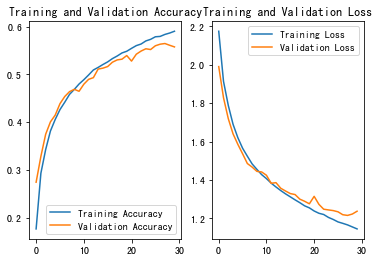

In [5]:
'''1、编写一个LeNet模型的类'''

class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5),    # 第一个卷积层，6个5*5的卷积核，激活函数为sigmoid
                         activation='sigmoid')
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2)   # 第一个池化层，采用步长为2的最大采样

        self.c2 = Conv2D(filters=16, kernel_size=(5, 5),   # 第二个卷积层，16个5*5的卷积核，激活函数为sigmoid
                         activation='sigmoid')
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2)   # 第二个池化层，采用步长为2的最大采样
        
        # 展开进入全连接层
        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')       # 120个神经元，激活函数为sigmoid
        self.f2 = Dense(84, activation='sigmoid')        # 84个神经元，激活函数为sigmoid
        self.f3 = Dense(10, activation='softmax')        # 输出10个类别，激活函数为softmax

    def call(self, x):
        x = self.c1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.p2(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y

'''2、模型参数设置'''
model = LeNet5()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

'''3、模型拟合'''
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

'''4、训练集和验证集的acc和loss曲线可视化'''
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### 4.1.2 模型预测和评估

In [ ]:
'''1、测试集测试'''
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores[1])

'''2、模型预测'''
prediction_probability = model.predict(x_test)
prediction = np.argmax(prediction_probability, axis=1)

'''模型评估——混淆矩阵'''
plt.figure(figsize=(6, 5))
confusion_matrix = pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['prediction'])     
print("该模型的混淆矩阵为:\n{}".format(confusion_matrix))    # 输出混淆矩阵
sns.set(font_scale=2)
sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
plt.title("Confusion Matrix", size=18)        # 添加标题
plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
plt.ylabel('True value', size=15)         # 添加y轴副标题
plt.show()

In [6]:
print(f'LeNet_acc:{acc}', f'LeNet_val_acc:{val_acc}', f'LeNet_loss:{loss}', f'LeNet_val_loss:{val_loss}',sep='\n')

LeNet_acc:[0.1740799993276596, 0.2726599872112274, 0.3227800130844116, 0.3652600049972534, 0.3949800133705139, 0.4136199951171875, 0.4309000074863434, 0.44332000613212585, 0.45778000354766846, 0.46724000573158264, 0.47901999950408936, 0.4869399964809418, 0.49803999066352844, 0.5050600171089172, 0.5128200054168701, 0.5173400044441223, 0.5267800092697144, 0.5323600172996521, 0.53711998462677, 0.5398600101470947, 0.5464199781417847, 0.5506200194358826, 0.5580599904060364, 0.5618399977684021, 0.5666199922561646, 0.5710399746894836, 0.574400007724762, 0.5777999758720398, 0.58406001329422, 0.5874199867248535]
LeNet_val_acc:[0.24979999661445618, 0.296099990606308, 0.35749998688697815, 0.3935999870300293, 0.4106000065803528, 0.4205999970436096, 0.43950000405311584, 0.4521999955177307, 0.45980000495910645, 0.4722999930381775, 0.4765999913215637, 0.4745999872684479, 0.4927000105381012, 0.4977000057697296, 0.5029000043869019, 0.515999972820282, 0.517799973487854, 0.5221999883651733, 0.52240002155

### 4.2 AlexNet

![](https://ss1.bdstatic.com/70cFuXSh_Q1YnxGkpoWK1HF6hhy/it/u=2673792179,1818650266&fm=26&gp=0.jpg)

### 4.2.1 模型搭建

Epoch 1/30
391/391 [==============================] - 9s 20ms/step - loss: 1.8327 - sparse_categorical_accuracy: 0.3251 - val_loss: 2.7119 - val_sparse_categorical_accuracy: 0.2024
Epoch 2/30
391/391 [==============================] - 7s 19ms/step - loss: 1.1863 - sparse_categorical_accuracy: 0.5781 - val_loss: 1.3644 - val_sparse_categorical_accuracy: 0.5282
Epoch 3/30
391/391 [==============================] - 7s 19ms/step - loss: 0.9927 - sparse_categorical_accuracy: 0.6556 - val_loss: 1.2271 - val_sparse_categorical_accuracy: 0.5854
Epoch 4/30
391/391 [==============================] - 7s 19ms/step - loss: 0.8832 - sparse_categorical_accuracy: 0.6963 - val_loss: 1.1439 - val_sparse_categorical_accuracy: 0.6106
Epoch 5/30
391/391 [==============================] - 7s 19ms/step - loss: 0.8043 - sparse_categorical_accuracy: 0.7249 - val_loss: 1.2984 - val_sparse_categorical_accuracy: 0.5884
Epoch 6/30
391/391 [==============================] - 7s 19ms/step - loss: 0.7250 - sparse_cate

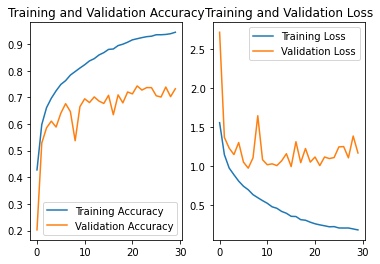

In [8]:
'''1、编写一个AlexNet模型的类'''

class AlexNet8(Model):
    def __init__(self):
        super(AlexNet8, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))    # 第一个卷积层，96个3*3的卷积核
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')                       # 激活函数为relu，提升速度，防止梯度爆炸
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)   # 最大池化区域为3*3，步长为2

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same',
                         activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                         activation='relu')
        self.p3 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p3(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y
    
'''2、模型参数设置'''
model = AlexNet8()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

'''3、模型拟合'''
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

'''4、训练集和验证集的acc和loss曲线可视化'''
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 4.2.2 模型预测和评估

In [ ]:
'''1、测试集测试'''
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores[1])

'''2、模型预测'''
prediction_probability = model.predict(x_test)
prediction = np.argmax(prediction_probability, axis=1)

'''模型评估——混淆矩阵'''
plt.figure(figsize=(6, 5))
confusion_matrix = pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['prediction'])     
print("该模型的混淆矩阵为:\n{}".format(confusion_matrix))    # 输出混淆矩阵
sns.set(font_scale=2)
sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
plt.title("Confusion Matrix", size=18)        # 添加标题
plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
plt.ylabel('True value', size=15)         # 添加y轴副标题
plt.show()

In [9]:
print(f'AlexNet_acc:{acc}', f'AlexNet_val_acc:{val_acc}', f'AlexNet_loss:{loss}', f'AlexNet_val_loss:{val_loss}',sep='\n')

AlexNet_acc:[0.4275600016117096, 0.5975800156593323, 0.6611400246620178, 0.6964200139045715, 0.7242400050163269, 0.7483800053596497, 0.7625600099563599, 0.7834600210189819, 0.7966799736022949, 0.8099200129508972, 0.8223000168800354, 0.8365600109100342, 0.8450800180435181, 0.858959972858429, 0.8675600290298462, 0.879800021648407, 0.8813400268554688, 0.8941400051116943, 0.8993600010871887, 0.9068199992179871, 0.9156399965286255, 0.9198799729347229, 0.924019992351532, 0.9275799989700317, 0.9293199777603149, 0.9348000288009644, 0.9347599744796753, 0.9359400272369385, 0.9386600255966187, 0.9441800117492676]
AlexNet_val_acc:[0.20239999890327454, 0.5281999707221985, 0.5853999853134155, 0.6105999946594238, 0.5884000062942505, 0.6403999924659729, 0.6761999726295471, 0.6462000012397766, 0.5371000170707703, 0.6650000214576721, 0.6944000124931335, 0.6801999807357788, 0.7014999985694885, 0.6858000159263611, 0.6769000291824341, 0.7074999809265137, 0.6347000002861023, 0.7091000080108643, 0.6791999936

### 4.3 VGGNet

![](https://ss1.bdstatic.com/70cFuXSh_Q1YnxGkpoWK1HF6hhy/it/u=76350089,1369972320&fm=11&gp=0.jpg)

### 4.3.1 模型搭建

Epoch 1/30
391/391 [==============================] - 18s 41ms/step - loss: 2.1099 - sparse_categorical_accuracy: 0.1808 - val_loss: 3.1505 - val_sparse_categorical_accuracy: 0.1620
Epoch 2/30
391/391 [==============================] - 15s 39ms/step - loss: 1.5287 - sparse_categorical_accuracy: 0.4017 - val_loss: 1.6223 - val_sparse_categorical_accuracy: 0.4886
Epoch 3/30
391/391 [==============================] - 15s 38ms/step - loss: 1.1273 - sparse_categorical_accuracy: 0.5950 - val_loss: 1.1736 - val_sparse_categorical_accuracy: 0.6044
Epoch 4/30
391/391 [==============================] - 15s 38ms/step - loss: 0.9079 - sparse_categorical_accuracy: 0.6830 - val_loss: 1.3451 - val_sparse_categorical_accuracy: 0.6021
Epoch 5/30
391/391 [==============================] - 15s 38ms/step - loss: 0.7791 - sparse_categorical_accuracy: 0.7338 - val_loss: 1.1865 - val_sparse_categorical_accuracy: 0.6399
Epoch 6/30
391/391 [==============================] - 15s 38ms/step - loss: 0.6663 - spars

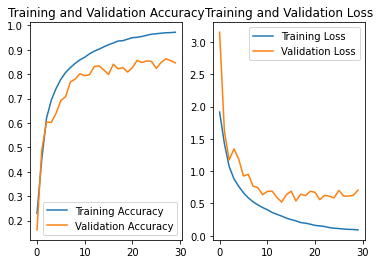

In [10]:
'''1、编写一个VGGNet模型的类'''

class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  # 卷积层1-1:64个3*3的卷积核
        self.b1 = BatchNormalization()             # BN层1-1
        self.a1 = Activation('relu')              # 激活层1-1：relu
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')   # 卷积层1-2:64个3*3的卷积核
        self.b2 = BatchNormalization()           # BN层1-2
        self.a2 = Activation('relu')             # 激活层1-2:relu
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')   # 池化层1:2*2的池化区域，步长为2
        self.d1 = Dropout(0.2)              # dropout层1

        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')  # 卷积层2-1:128个3*3的卷积核
        self.b3 = BatchNormalization()          # BN层2-1
        self.a3 = Activation('relu')            # 激活层2-1:relu
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')  # 卷积层2-2:128个3*3的卷积核
        self.b4 = BatchNormalization()         # BN层2-2
        self.a4 = Activation('relu')           # 激活层2-2:relu
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')   # 池化层2:2*2的池化区域，步长为2
        self.d2 = Dropout(0.2)              # dropout层2

        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')  # 卷积层3-1:256个3*3的卷积核
        self.b5 = BatchNormalization()         # BN层3-1
        self.a5 = Activation('relu')           # 激活层3-1:relu
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')  # 卷积层3-2:256个3*3的卷积核
        self.b6 = BatchNormalization()         # BN层3-2
        self.a6 = Activation('relu')           # 激活层3-2:relu
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')  # 卷积层3-3:256个3*3的卷积核
        self.b7 = BatchNormalization()         # BN层3-3
        self.a7 = Activation('relu')           # 激活层3-3:relu
        self.p3 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')   # 池化层3:2*2的池化区域，步长为2
        self.d3 = Dropout(0.2)                 # dropout层3

        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')  # 卷积层4-1:512个3*3的卷积核
        self.b8 = BatchNormalization()        # BN层4-1
        self.a8 = Activation('relu')          # 激活层4-1：relu
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')  # 卷积层4-2:512个3*3的卷积核
        self.b9 = BatchNormalization()        # BN层4-2
        self.a9 = Activation('relu')          # 激活层4-2:relu
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same') # 卷积层4-3:512个3*3的卷积核
        self.b10 = BatchNormalization()       # BN层4-3       
        self.a10 = Activation('relu')         # 激活层4-3:relu
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')   # 池化层4:2*2的池化区域，步长为2
        self.d4 = Dropout(0.2)                # dropout层4

        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')  # 卷积层5-1:512个3*3的卷积核
        self.b11 = BatchNormalization()       # BN层5-1
        self.a11 = Activation('relu')         # 激活层5-1：relu
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')  # 卷积层5-2:512个3*3的卷积核
        self.b12 = BatchNormalization()       # BN层5-2
        self.a12 = Activation('relu')         # 激活层5-2:relu
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')  # 卷积层5-3:512个3*3的卷积核
        self.b13 = BatchNormalization()       # BN层5-3
        self.a13 = Activation('relu')         # BN层5-3:relu
        self.p5 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')    # 池化层5:2*2的池化区域，步长为2
        self.d5 = Dropout(0.2)                # dropout层5

        self.flatten = Flatten()            # 展开输入全连接层
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d6(x)
        x = self.f2(x)
        x = self.d7(x)
        y = self.f3(x)
        return y

'''2、模型参数设置'''

model = VGG16()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

'''3、模型拟合'''
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

'''4、训练集和验证集的acc和loss曲线可视化'''
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 4.3.2 模型预测和评估

In [ ]:
'''1、测试集测试'''
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores[1])

'''2、模型预测'''
prediction_probability = model.predict(x_test)
prediction = np.argmax(prediction_probability, axis=1)

'''模型评估——混淆矩阵'''
plt.figure(figsize=(6, 5))
confusion_matrix = pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['prediction'])     
print("该模型的混淆矩阵为:\n{}".format(confusion_matrix))    # 输出混淆矩阵
sns.set(font_scale=2)
sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
plt.title("Confusion Matrix", size=18)        # 添加标题
plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
plt.ylabel('True value', size=15)         # 添加y轴副标题
plt.show()

In [11]:
print(f'VGGNet_acc:{acc}', f'VGGNet_val_acc:{val_acc}', f'VGGNet_loss:{loss}', f'VGGNet_val_loss:{val_loss}',sep='\n')

VGGNet_acc:[0.2295999974012375, 0.4516800045967102, 0.6197800040245056, 0.6935799717903137, 0.7410799860954285, 0.7791399955749512, 0.8068199753761292, 0.8270599842071533, 0.8440399765968323, 0.8585799932479858, 0.8693199753761292, 0.8832600116729736, 0.8939399719238281, 0.9023399949073792, 0.91184002161026, 0.9206200242042542, 0.9274600148200989, 0.9356399774551392, 0.9369400143623352, 0.9434000253677368, 0.9493600130081177, 0.9508399963378906, 0.9543600082397461, 0.9591000080108643, 0.9636399745941162, 0.9655399918556213, 0.9675800204277039, 0.9694399833679199, 0.9700999855995178, 0.9716200232505798]
VGGNet_val_acc:[0.16200000047683716, 0.4885999858379364, 0.6043999791145325, 0.6021000146865845, 0.6399000287055969, 0.6919000148773193, 0.7078999876976013, 0.7680000066757202, 0.7796000242233276, 0.8016999959945679, 0.7936999797821045, 0.7976999878883362, 0.8313000202178955, 0.8339999914169312, 0.8173999786376953, 0.798799991607666, 0.8407999873161316, 0.8215000033378601, 0.826600015163

### 4.4 GoogLeNet

![](https://ss1.bdstatic.com/70cFvXSh_Q1YnxGkpoWK1HF6hhy/it/u=2744644846,1262336121&fm=26&gp=0.jpg)

### 4.4.1 模型搭建

Epoch 1/30
391/391 [==============================] - 21s 38ms/step - loss: 1.9770 - sparse_categorical_accuracy: 0.2417 - val_loss: 1.5087 - val_sparse_categorical_accuracy: 0.4411
Epoch 2/30
391/391 [==============================] - 14s 35ms/step - loss: 1.4106 - sparse_categorical_accuracy: 0.4736 - val_loss: 1.2808 - val_sparse_categorical_accuracy: 0.5368
Epoch 3/30
391/391 [==============================] - 14s 36ms/step - loss: 1.1943 - sparse_categorical_accuracy: 0.5673 - val_loss: 1.0998 - val_sparse_categorical_accuracy: 0.6044
Epoch 4/30
391/391 [==============================] - 14s 36ms/step - loss: 1.0381 - sparse_categorical_accuracy: 0.6286 - val_loss: 0.9713 - val_sparse_categorical_accuracy: 0.6498
Epoch 5/30
391/391 [==============================] - 14s 36ms/step - loss: 0.9088 - sparse_categorical_accuracy: 0.6731 - val_loss: 0.9179 - val_sparse_categorical_accuracy: 0.6711
Epoch 6/30
391/391 [==============================] - 14s 36ms/step - loss: 0.8171 - spars

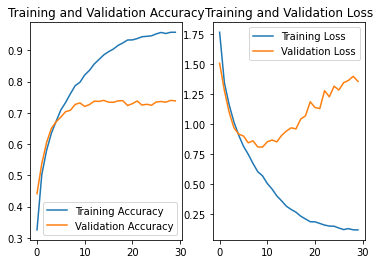

In [13]:
'''1、编写一个GoogLeNet模型的类'''
class ConvBNRelu(Model):
    def __init__(self, ch, kernelsz=3, strides=1, padding='same'):
        super(ConvBNRelu, self).__init__()
        self.model = tf.keras.models.Sequential([
            Conv2D(ch, kernelsz, strides=strides, padding=padding),
            BatchNormalization(),
            Activation('relu')
        ])

    def call(self, x):
        '''
        当training=False时，BN通过整个训练集计算均值、方差去做批归一化；
        当training=True时，通过当前batch的均值、方差去做批归一化。
        '''
        x = self.model(x, training=False) 
        return x

# 构建Inception v1模块
class InceptionBlk(Model):    
    def __init__(self, ch, strides=1):
        super(InceptionBlk, self).__init__()
        self.ch = ch
        self.strides = strides
        self.c1 = ConvBNRelu(ch, kernelsz=1, strides=strides)     # 1*1卷积
        self.c2_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)   # 1*1卷积，进行降维
        self.c2_2 = ConvBNRelu(ch, kernelsz=3, strides=1)         # 降维之后进行3*3卷积
        self.c3_1 = ConvBNRelu(ch, kernelsz=1, strides=strides)   # 1*1卷积，进行降维
        self.c3_2 = ConvBNRelu(ch, kernelsz=5, strides=1)         # 降维之后进行5*5卷积
        self.p4_1 = MaxPool2D(3, strides=1, padding='same')       # 最大池化，步长为1
        self.c4_2 = ConvBNRelu(ch, kernelsz=1, strides=strides)   # 池化之后进行1*1卷积

    def call(self, x):
        x1 = self.c1(x)
        x2_1 = self.c2_1(x)
        x2_2 = self.c2_2(x2_1)
        x3_1 = self.c3_1(x)
        x3_2 = self.c3_2(x3_1)
        x4_1 = self.p4_1(x)
        x4_2 = self.c4_2(x4_1)
        
        x = tf.concat([x1, x2_2, x3_2, x4_2], axis=3)   # 沿通道进行拼接
        return x


class Inception10(Model):
    def __init__(self, num_blocks, num_classes, init_ch=16, **kwargs):
        super(Inception10, self).__init__(**kwargs)
        self.in_channels = init_ch
        self.out_channels = init_ch
        self.num_blocks = num_blocks
        self.init_ch = init_ch
        self.c1 = ConvBNRelu(init_ch)
        self.blocks = tf.keras.models.Sequential()
        for block_id in range(num_blocks):
            for layer_id in range(3):
                if layer_id == 0:
                    block = InceptionBlk(self.out_channels, strides=2)
                else:
                    block = InceptionBlk(self.out_channels, strides=1)
                self.blocks.add(block)
            # enlarger out_channels per block
            self.out_channels *= 2
        self.p1 = GlobalAveragePooling2D()
        self.f1 = Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

'''2、模型参数设置'''
model = Inception10(num_blocks=3, num_classes=10)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])


'''3、模型拟合'''
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

'''4、训练集和验证集的acc和loss曲线可视化'''
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### 4.4.2 模型预测和评估

In [ ]:
'''1、测试集测试'''
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores[1])

'''2、模型预测'''
prediction_probability = model.predict(x_test)
prediction = np.argmax(prediction_probability, axis=1)

'''模型评估——混淆矩阵'''
plt.figure(figsize=(6, 5))
confusion_matrix = pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['prediction'])     
print("该模型的混淆矩阵为:\n{}".format(confusion_matrix))    # 输出混淆矩阵
sns.set(font_scale=2)
sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
plt.title("Confusion Matrix", size=18)        # 添加标题
plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
plt.ylabel('True value', size=15)         # 添加y轴副标题
plt.show()

In [14]:
print(f'InceptionNet_acc:{acc}', f'InceptionNet_val_acc:{val_acc}', f'InceptionNet_loss:{loss}', f'InceptionNet_val_loss:{val_loss}',sep='\n')

InceptionNet_acc:[0.32506000995635986, 0.501479983329773, 0.5791199803352356, 0.6337800025939941, 0.6724399924278259, 0.7090799808502197, 0.7332000136375427, 0.7609599828720093, 0.7868199944496155, 0.7978000044822693, 0.8209199905395508, 0.8360199928283691, 0.8562399744987488, 0.8707000017166138, 0.8854600191116333, 0.8956800103187561, 0.9040200114250183, 0.9158200025558472, 0.9238200187683105, 0.9331200122833252, 0.9334200024604797, 0.9376599788665771, 0.9434800148010254, 0.9449399709701538, 0.9464799761772156, 0.9527199864387512, 0.9573000073432922, 0.9538999795913696, 0.9578400254249573, 0.9579600095748901]
InceptionNet_val_acc:[0.44110000133514404, 0.5368000268936157, 0.6043999791145325, 0.6498000025749207, 0.6711000204086304, 0.6862000226974487, 0.7038000226020813, 0.7080000042915344, 0.7268999814987183, 0.7317000031471252, 0.7203999757766724, 0.7264000177383423, 0.7372999787330627, 0.7365000247955322, 0.739799976348877, 0.7340999841690063, 0.7336999773979187, 0.7382000088691711, 

### 4.5 ResNet

![](https://ss0.bdstatic.com/70cFvHSh_Q1YnxGkpoWK1HF6hhy/it/u=1796563847,3745838825&fm=26&gp=0.jpg)

### 4.5.1 模型搭建

Epoch 1/30
391/391 [==============================] - 27s 64ms/step - loss: 1.7458 - sparse_categorical_accuracy: 0.4564 - val_loss: 2.1898 - val_sparse_categorical_accuracy: 0.4286
Epoch 2/30
391/391 [==============================] - 24s 62ms/step - loss: 0.8870 - sparse_categorical_accuracy: 0.7236 - val_loss: 1.7635 - val_sparse_categorical_accuracy: 0.5486
Epoch 3/30
391/391 [==============================] - 25s 63ms/step - loss: 0.6179 - sparse_categorical_accuracy: 0.8059 - val_loss: 0.8239 - val_sparse_categorical_accuracy: 0.7448
Epoch 4/30
391/391 [==============================] - 24s 62ms/step - loss: 0.4589 - sparse_categorical_accuracy: 0.8542 - val_loss: 1.3150 - val_sparse_categorical_accuracy: 0.6392
Epoch 5/30
391/391 [==============================] - 24s 63ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.8928 - val_loss: 0.8099 - val_sparse_categorical_accuracy: 0.7617
Epoch 6/30
391/391 [==============================] - 24s 63ms/step - loss: 0.2512 - spars

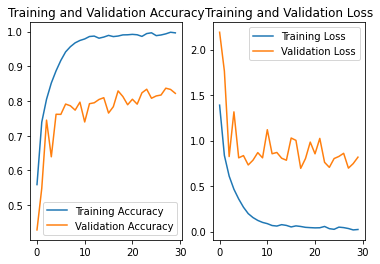

In [16]:
'''1、编写一个ResNet模型的类'''
class ResnetBlock(Model):

    def __init__(self, filters, strides=1, residual_path=False):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides
        self.residual_path = residual_path

        self.c1 = Conv2D(filters, (3, 3), strides=strides, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')

        self.c2 = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b2 = BatchNormalization()

        # residual_path为True时，对输入进行下采样，即用1x1的卷积核做卷积操作，保证x能和F(x)维度相同，顺利相加
        if residual_path:
            self.down_c1 = Conv2D(filters, (1, 1), strides=strides, padding='same', use_bias=False)
            self.down_b1 = BatchNormalization()
        
        self.a2 = Activation('relu')

    def call(self, inputs):
        residual = inputs  # residual等于输入值本身，即residual=x
        # 将输入通过卷积、BN层、激活层，计算F(x)
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)

        x = self.c2(x)
        y = self.b2(x)

        if self.residual_path:
            residual = self.down_c1(inputs)
            residual = self.down_b1(residual)

        out = self.a2(y + residual)  # 最后输出的是两部分的和，即F(x)+x或F(x)+Wx,再过激活函数
        return out


class ResNet18(Model):

    def __init__(self, block_list, initial_filters=64):  # block_list表示每个block有几个卷积层
        super(ResNet18, self).__init__()
        self.num_blocks = len(block_list)  # 共有几个block
        self.block_list = block_list
        self.out_filters = initial_filters
        self.c1 = Conv2D(self.out_filters, (3, 3), strides=1, padding='same', use_bias=False)
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.blocks = tf.keras.models.Sequential()
        # 构建ResNet网络结构
        for block_id in range(len(block_list)):  # 第几个resnet block
            for layer_id in range(block_list[block_id]):  # 第几个卷积层

                if block_id != 0 and layer_id == 0:  # 对除第一个block以外的每个block的输入进行下采样
                    block = ResnetBlock(self.out_filters, strides=2, residual_path=True)
                else:
                    block = ResnetBlock(self.out_filters, residual_path=False)
                self.blocks.add(block)  # 将构建好的block加入resnet
            self.out_filters *= 2  # 下一个block的卷积核数是上一个block的2倍
        self.p1 = tf.keras.layers.GlobalAveragePooling2D()
        self.f1 = tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, inputs):
        x = self.c1(inputs)
        x = self.b1(x)
        x = self.a1(x)
        x = self.blocks(x)
        x = self.p1(x)
        y = self.f1(x)
        return y

'''2、模型参数设置'''
model = ResNet18([2, 2, 2, 2])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

'''3、模型拟合'''
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

'''4、训练集和验证集的acc和loss曲线可视化'''
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### 4.5.2 模型预测和评估

In [ ]:
'''1、测试集测试'''
scores = model.evaluate(x_test, y_test, verbose=2)
print(scores[1])

'''2、模型预测'''
prediction_probability = model.predict(x_test)
prediction = np.argmax(prediction_probability, axis=1)

'''模型评估——混淆矩阵'''
plt.figure(figsize=(6, 5))
confusion_matrix = pd.crosstab(y_test.reshape(-1),prediction,rownames=['label'],colnames=['prediction'])     
print("该模型的混淆矩阵为:\n{}".format(confusion_matrix))    # 输出混淆矩阵
sns.set(font_scale=2)
sns.heatmap(confusion_matrix, square=True, annot=True, cmap='Set3')    # 用seaborn绘制混淆矩阵的热力图
plt.title("Confusion Matrix", size=18)        # 添加标题
plt.xlabel('Predicted value', size=15)       # 添加x轴副标题
plt.ylabel('True value', size=15)         # 添加y轴副标题
plt.show()

In [17]:
print(f'ResNet_acc:{acc}', f'ResNet_val_acc:{val_acc}', f'ResNet_loss:{loss}', f'ResNet_val_loss:{val_loss}',sep='\n')

ResNet_acc:[0.5591400265693665, 0.7389000058174133, 0.8049399852752686, 0.8517000079154968, 0.8868600130081177, 0.9168400168418884, 0.9413599967956543, 0.9563199877738953, 0.9674400091171265, 0.9742799997329712, 0.9786199927330017, 0.9856600165367126, 0.9868800044059753, 0.9807999730110168, 0.9840599894523621, 0.988860011100769, 0.9854199886322021, 0.9869999885559082, 0.9902999997138977, 0.9906200170516968, 0.9918199777603149, 0.9906600117683411, 0.9860000014305115, 0.9940999746322632, 0.9963600039482117, 0.9881600141525269, 0.9900599718093872, 0.9933199882507324, 0.9979400038719177, 0.99617999792099]
ResNet_val_acc:[0.428600013256073, 0.5486000180244446, 0.7447999715805054, 0.63919997215271, 0.7616999745368958, 0.7613999843597412, 0.791100025177002, 0.7860999703407288, 0.7735999822616577, 0.7965999841690063, 0.7394999861717224, 0.7921000123023987, 0.7947999835014343, 0.8043000102043152, 0.8094000220298767, 0.7652000188827515, 0.7835000157356262, 0.8289999961853027, 0.8127999901771545,

## 5. 模型比较

In [9]:
LeNet_acc = [0.1740799993276596, 0.2726599872112274, 0.3227800130844116, 0.3652600049972534, 0.3949800133705139, 0.4136199951171875, 0.4309000074863434, 0.44332000613212585, 0.45778000354766846, 0.46724000573158264, 0.47901999950408936, 0.4869399964809418, 0.49803999066352844, 0.5050600171089172, 0.5128200054168701, 0.5173400044441223, 0.5267800092697144, 0.5323600172996521, 0.53711998462677, 0.5398600101470947, 0.5464199781417847, 0.5506200194358826, 0.5580599904060364, 0.5618399977684021, 0.5666199922561646, 0.5710399746894836, 0.574400007724762, 0.5777999758720398, 0.58406001329422, 0.5874199867248535]
LeNet_val_acc = [0.24979999661445618, 0.296099990606308, 0.35749998688697815, 0.3935999870300293, 0.4106000065803528, 0.4205999970436096, 0.43950000405311584, 0.4521999955177307, 0.45980000495910645, 0.4722999930381775, 0.4765999913215637, 0.4745999872684479, 0.4927000105381012, 0.4977000057697296, 0.5029000043869019, 0.515999972820282, 0.517799973487854, 0.5221999883651733, 0.5224000215530396, 0.5216000080108643, 0.5250999927520752, 0.5311999917030334, 0.5379999876022339, 0.5404999852180481, 0.5410000085830688, 0.5446000099182129, 0.545199990272522, 0.5526999831199646, 0.5490999817848206, 0.5512999892234802]
LeNet_loss = [2.1743953227996826, 1.961212158203125, 1.836844563484192, 1.7353403568267822, 1.661391258239746, 1.6051968336105347, 1.554754376411438, 1.5227577686309814, 1.4856420755386353, 1.4598065614700317, 1.4355485439300537, 1.4125465154647827, 1.3887791633605957, 1.3724348545074463, 1.3538556098937988, 1.3392845392227173, 1.318405032157898, 1.3043462038040161, 1.2890052795410156, 1.2767976522445679, 1.2674620151519775, 1.2507858276367188, 1.2347373962402344, 1.226847529411316, 1.2133598327636719, 1.200690746307373, 1.190406084060669, 1.180934190750122, 1.1695020198822021, 1.1583623886108398]
LeNet_val_loss = [2.023043632507324, 1.8952068090438843, 1.7741512060165405, 1.6662673950195312, 1.6117568016052246, 1.5667911767959595, 1.5254790782928467, 1.4915125370025635, 1.4710838794708252, 1.4425323009490967, 1.4260904788970947, 1.424329161643982, 1.3974372148513794, 1.3797156810760498, 1.3720117807388306, 1.3415976762771606, 1.3395652770996094, 1.3252960443496704, 1.3159040212631226, 1.305032730102539, 1.2963217496871948, 1.2885115146636963, 1.2828112840652466, 1.2775343656539917, 1.2689772844314575, 1.2523921728134155, 1.2640340328216553, 1.239121437072754, 1.249819040298462, 1.2444976568222046]

In [10]:
AlexNet_acc = [0.4275600016117096, 0.5975800156593323, 0.6611400246620178, 0.6964200139045715, 0.7242400050163269, 0.7483800053596497, 0.7625600099563599, 0.7834600210189819, 0.7966799736022949, 0.8099200129508972, 0.8223000168800354, 0.8365600109100342, 0.8450800180435181, 0.858959972858429, 0.8675600290298462, 0.879800021648407, 0.8813400268554688, 0.8941400051116943, 0.8993600010871887, 0.9068199992179871, 0.9156399965286255, 0.9198799729347229, 0.924019992351532, 0.9275799989700317, 0.9293199777603149, 0.9348000288009644, 0.9347599744796753, 0.9359400272369385, 0.9386600255966187, 0.9441800117492676]
AlexNet_val_acc = [0.20239999890327454, 0.5281999707221985, 0.5853999853134155, 0.6105999946594238, 0.5884000062942505, 0.6403999924659729, 0.6761999726295471, 0.6462000012397766, 0.5371000170707703, 0.6650000214576721, 0.6944000124931335, 0.6801999807357788, 0.7014999985694885, 0.6858000159263611, 0.6769000291824341, 0.7074999809265137, 0.6347000002861023, 0.7091000080108643, 0.6791999936103821, 0.7200000286102295, 0.7128000259399414, 0.7426999807357788, 0.7271999716758728, 0.7365000247955322, 0.736299991607666, 0.7056999802589417, 0.7010999917984009, 0.7386000156402588, 0.7024000287055969, 0.7321000099182129]
AlexNet_loss = [1.5528254508972168, 1.1424399614334106, 0.9717538356781006, 0.8853387236595154, 0.8034424185752869, 0.7382578253746033, 0.6929312348365784, 0.6300841569900513, 0.5911815762519836, 0.5536832213401794, 0.519286572933197, 0.4744846522808075, 0.45535948872566223, 0.41533714532852173, 0.391507625579834, 0.3524106740951538, 0.34972718358039856, 0.30955642461776733, 0.30231720209121704, 0.27716898918151855, 0.2569025158882141, 0.2427583783864975, 0.23115798830986023, 0.21816286444664001, 0.2206495851278305, 0.20320022106170654, 0.20237961411476135, 0.20286032557487488, 0.19060742855072021, 0.17815189063549042]
AlexNet_val_loss = [2.711869478225708, 1.364432454109192, 1.2271302938461304, 1.1439437866210938, 1.2984411716461182, 1.0472348928451538, 0.9696463942527771, 1.1015305519104004, 1.641581654548645, 1.0780383348464966, 1.0132627487182617, 1.0252177715301514, 1.0028246641159058, 1.0633518695831299, 1.154691457748413, 0.9902437329292297, 1.3082256317138672, 1.0400995016098022, 1.221880316734314, 1.0470255613327026, 1.1126258373260498, 1.0025664567947388, 1.1128501892089844, 1.0927273035049438, 1.1056082248687744, 1.2422714233398438, 1.2465494871139526, 1.1019808053970337, 1.3816834688186646, 1.1644209623336792]

In [11]:
VGGNet_acc = [0.2295999974012375, 0.4516800045967102, 0.6197800040245056, 0.6935799717903137, 0.7410799860954285, 0.7791399955749512, 0.8068199753761292, 0.8270599842071533, 0.8440399765968323, 0.8585799932479858, 0.8693199753761292, 0.8832600116729736, 0.8939399719238281, 0.9023399949073792, 0.91184002161026, 0.9206200242042542, 0.9274600148200989, 0.9356399774551392, 0.9369400143623352, 0.9434000253677368, 0.9493600130081177, 0.9508399963378906, 0.9543600082397461, 0.9591000080108643, 0.9636399745941162, 0.9655399918556213, 0.9675800204277039, 0.9694399833679199, 0.9700999855995178, 0.9716200232505798]
VGGNet_val_acc = [0.16200000047683716, 0.4885999858379364, 0.6043999791145325, 0.6021000146865845, 0.6399000287055969, 0.6919000148773193, 0.7078999876976013, 0.7680000066757202, 0.7796000242233276, 0.8016999959945679, 0.7936999797821045, 0.7976999878883362, 0.8313000202178955, 0.8339999914169312, 0.8173999786376953, 0.798799991607666, 0.8407999873161316, 0.8215000033378601, 0.8266000151634216, 0.8084999918937683, 0.8267999887466431, 0.8567000031471252, 0.8478000164031982, 0.8540999889373779, 0.852400004863739, 0.8233000040054321, 0.847599983215332, 0.8626000285148621, 0.855400025844574, 0.8461999893188477]
VGGNet_loss = [1.9147896766662598, 1.427818775177002, 1.0729258060455322, 0.881992518901825, 0.7645883560180664, 0.6662532687187195, 0.5877528786659241, 0.5265541672706604, 0.47877055406570435, 0.43724489212036133, 0.40332546830177307, 0.3616982698440552, 0.33280402421951294, 0.3043074309825897, 0.27245184779167175, 0.25048044323921204, 0.23038847744464874, 0.20433084666728973, 0.1951819211244583, 0.1792474389076233, 0.16035084426403046, 0.1524198353290558, 0.1434759497642517, 0.12683835625648499, 0.11683904379606247, 0.11161729693412781, 0.10421272367238998, 0.09882785379886627, 0.09705211967229843, 0.09050708264112473]
VGGNet_val_loss = [3.150491952896118, 1.622336506843567, 1.1735625267028809, 1.3451287746429443, 1.1864718198776245, 0.9249231219291687, 0.9512845873832703, 0.7676407098770142, 0.7469597458839417, 0.6363677978515625, 0.6858886480331421, 0.6905842423439026, 0.5941300988197327, 0.5224530100822449, 0.6358010768890381, 0.6902399659156799, 0.5387555956840515, 0.6428880095481873, 0.6227024793624878, 0.6876624226570129, 0.6726736426353455, 0.5587806105613708, 0.6249729990959167, 0.6121532917022705, 0.5866114497184753, 0.7019426822662354, 0.6146084070205688, 0.6151727437973022, 0.6256621479988098, 0.7064194679260254]

In [12]:
InceptionNet_acc = [0.32506000995635986, 0.501479983329773, 0.5791199803352356, 0.6337800025939941, 0.6724399924278259, 0.7090799808502197, 0.7332000136375427, 0.7609599828720093, 0.7868199944496155, 0.7978000044822693, 0.8209199905395508, 0.8360199928283691, 0.8562399744987488, 0.8707000017166138, 0.8854600191116333, 0.8956800103187561, 0.9040200114250183, 0.9158200025558472, 0.9238200187683105, 0.9331200122833252, 0.9334200024604797, 0.9376599788665771, 0.9434800148010254, 0.9449399709701538, 0.9464799761772156, 0.9527199864387512, 0.9573000073432922, 0.9538999795913696, 0.9578400254249573, 0.9579600095748901]
InceptionNet_val_acc = [0.44110000133514404, 0.5368000268936157, 0.6043999791145325, 0.6498000025749207, 0.6711000204086304, 0.6862000226974487, 0.7038000226020813, 0.7080000042915344, 0.7268999814987183, 0.7317000031471252, 0.7203999757766724, 0.7264000177383423, 0.7372999787330627, 0.7365000247955322, 0.739799976348877, 0.7340999841690063, 0.7336999773979187, 0.7382000088691711, 0.7387999892234802, 0.7232999801635742, 0.7293999791145325, 0.7379000186920166, 0.7247999906539917, 0.7272999882698059, 0.7242000102996826, 0.7347000241279602, 0.7361999750137329, 0.7340999841690063, 0.7396000027656555, 0.7383999824523926]
InceptionNet_loss = [1.7661495208740234, 1.3460793495178223, 1.1626091003417969, 1.0194565057754517, 0.9095615744590759, 0.8173275589942932, 0.750362753868103, 0.6739612221717834, 0.6052061915397644, 0.5704171061515808, 0.5069565773010254, 0.46067604422569275, 0.4034598767757416, 0.3623080551624298, 0.3178268074989319, 0.29087913036346436, 0.2684115469455719, 0.23525124788284302, 0.2116747796535492, 0.18889150023460388, 0.1881164014339447, 0.1745707094669342, 0.1610308438539505, 0.15298959612846375, 0.15133123099803925, 0.13670094311237335, 0.1235571876168251, 0.13141201436519623, 0.12150352448225021, 0.12077993154525757]
InceptionNet_val_loss = [1.5086536407470703, 1.2807886600494385, 1.0997623205184937, 0.9713053703308105, 0.9179092645645142, 0.9026028513908386, 0.845630943775177, 0.8622265458106995, 0.8114320039749146, 0.8099282383918762, 0.8543436527252197, 0.869269847869873, 0.8535804748535156, 0.9074809551239014, 0.9437857270240784, 0.9706940650939941, 0.9616701006889343, 1.0432871580123901, 1.0705288648605347, 1.1875859498977661, 1.1392738819122314, 1.1310096979141235, 1.279868721961975, 1.2286676168441772, 1.3172414302825928, 1.2849571704864502, 1.3460140228271484, 1.3650623559951782, 1.3989020586013794, 1.3573520183563232]

In [13]:
ResNet_acc = [0.5591400265693665, 0.7389000058174133, 0.8049399852752686, 0.8517000079154968, 0.8868600130081177, 0.9168400168418884, 0.9413599967956543, 0.9563199877738953, 0.9674400091171265, 0.9742799997329712, 0.9786199927330017, 0.9856600165367126, 0.9868800044059753, 0.9807999730110168, 0.9840599894523621, 0.988860011100769, 0.9854199886322021, 0.9869999885559082, 0.9902999997138977, 0.9906200170516968, 0.9918199777603149, 0.9906600117683411, 0.9860000014305115, 0.9940999746322632, 0.9963600039482117, 0.9881600141525269, 0.9900599718093872, 0.9933199882507324, 0.9979400038719177, 0.99617999792099]
ResNet_val_acc = [0.428600013256073, 0.5486000180244446, 0.7447999715805054, 0.63919997215271, 0.7616999745368958, 0.7613999843597412, 0.791100025177002, 0.7860999703407288, 0.7735999822616577, 0.7965999841690063, 0.7394999861717224, 0.7921000123023987, 0.7947999835014343, 0.8043000102043152, 0.8094000220298767, 0.7652000188827515, 0.7835000157356262, 0.8289999961853027, 0.8127999901771545, 0.7890999913215637, 0.8050000071525574, 0.7907999753952026, 0.8234999775886536, 0.8338000178337097, 0.8077999949455261, 0.8144999742507935, 0.8170999884605408, 0.8367999792098999, 0.8331999778747559, 0.8219000101089478]
ResNet_loss = [1.3887197971343994, 0.8363496661186218, 0.6094110012054443, 0.46469858288764954, 0.3577915132045746, 0.2673964500427246, 0.19679783284664154, 0.15355812013149261, 0.12231779098510742, 0.1004144623875618, 0.08694499731063843, 0.06614986062049866, 0.06034208834171295, 0.07566918432712555, 0.06741094589233398, 0.05067708343267441, 0.06230629235506058, 0.05578458681702614, 0.046375878155231476, 0.042968958616256714, 0.04046440124511719, 0.04163674637675285, 0.05596394091844559, 0.03169124200940132, 0.024496257305145264, 0.04851866513490677, 0.04323814809322357, 0.03324802964925766, 0.017942408099770546, 0.0225934199988842]
ResNet_val_loss = [2.189767360687256, 1.763451337814331, 0.8239004611968994, 1.3150123357772827, 0.8098582029342651, 0.8344842791557312, 0.7317509055137634, 0.7843815684318542, 0.8672741055488586, 0.8099161386489868, 1.1189770698547363, 0.8547877669334412, 0.8686606287956238, 0.8058968186378479, 0.7834904193878174, 1.0277072191238403, 1.0018526315689087, 0.6945385336875916, 0.8019588589668274, 0.9829205274581909, 0.85406094789505, 1.0234134197235107, 0.76067054271698, 0.7053483128547668, 0.8019495010375977, 0.8252089619636536, 0.8596825003623962, 0.6968292593955994, 0.7463387250900269, 0.8173919916152954]

### 5.1 模型验证集准确率可视化对比

In [60]:
data = {'LeNet_val_acc':LeNet_val_acc,
        'AlexNet_val_acc':AlexNet_val_acc,
        'VGGNet_val_acc':VGGNet_val_acc,
        'InceptionNet_val_acc':InceptionNet_val_acc,
        'ResNet_val_acc':ResNet_val_acc}
val_acc = pd.DataFrame(data,index = np.arange(1,31),
                       columns = ['LeNet_val_acc','AlexNet_val_acc','VGGNet_val_acc','InceptionNet_val_acc','ResNet_val_acc'])
val_acc

,LeNet_val_acc,AlexNet_val_acc,VGGNet_val_acc,InceptionNet_val_acc,ResNet_val_acc
1,0.2498,0.2024,0.1620,0.4411,0.4286
2,0.2961,0.5282,0.4886,0.5368,0.5486
3,0.3575,0.5854,0.6044,0.6044,0.7448
4,0.3936,0.6106,0.6021,0.6498,0.6392
5,0.4106,0.5884,0.6399,0.6711,0.7617
6,0.4206,0.6404,0.6919,0.6862,0.7614
7,0.4395,0.6762,0.7079,0.7038,0.7911
8,0.4522,0.6462,0.7680,0.7080,0.7861
9,0.4598,0.5371,0.7796,0.7269,0.7736
10,0.4723,0.6650,0.8017,0.7317,0.7966


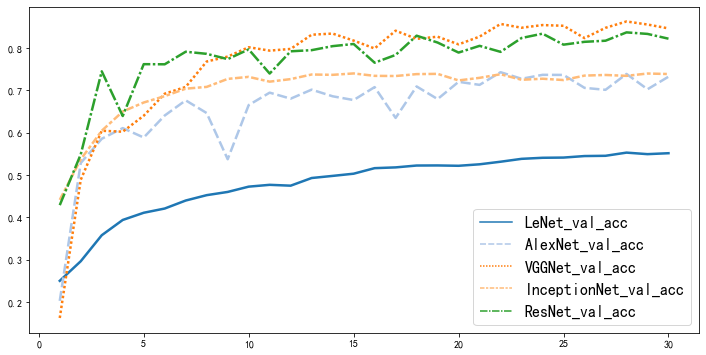

In [61]:
# 画出每个模型的验证集准确率折线图
plt.figure(figsize=(12,6))
sns.lineplot(data=val_acc, palette="tab20", linewidth=2.5)
plt.legend(fontsize=16)
plt.show()

### 5.2 模型验证集损失可视化对比

In [62]:
data = {'LeNet_val_loss':LeNet_val_loss,
        'AlexNet_val_loss':AlexNet_val_loss,
        'VGGNet_val_loss':VGGNet_val_loss,
        'InceptionNet_val_loss':InceptionNet_val_loss,
        'ResNet_val_loss':ResNet_val_loss}
val_loss = pd.DataFrame(data,index = np.arange(1,31),
                       columns = ['LeNet_val_loss','AlexNet_val_loss','VGGNet_val_loss','InceptionNet_val_loss','ResNet_val_loss'])
val_loss

,LeNet_val_loss,AlexNet_val_loss,VGGNet_val_loss,InceptionNet_val_loss,ResNet_val_loss
1,2.023044,2.711869,3.150492,1.508654,2.189767
2,1.895207,1.364432,1.622337,1.280789,1.763451
3,1.774151,1.227130,1.173563,1.099762,0.823900
4,1.666267,1.143944,1.345129,0.971305,1.315012
5,1.611757,1.298441,1.186472,0.917909,0.809858
6,1.566791,1.047235,0.924923,0.902603,0.834484
7,1.525479,0.969646,0.951285,0.845631,0.731751
8,1.491513,1.101531,0.767641,0.862227,0.784382
9,1.471084,1.641582,0.746960,0.811432,0.867274
10,1.442532,1.078038,0.636368,0.809928,0.809916


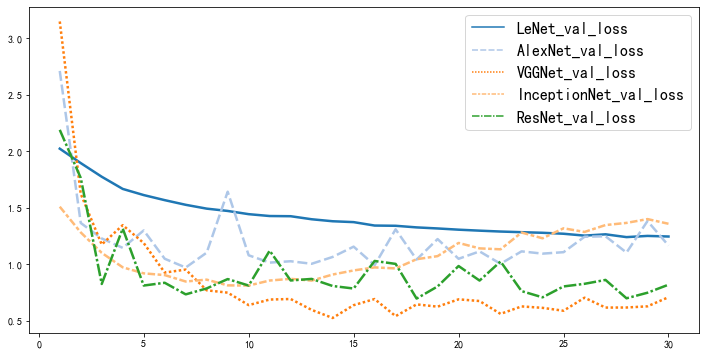

In [63]:
# 画出每个模型的验证集损失折线图
plt.figure(figsize=(12,6))
sns.lineplot(data=val_loss, palette="tab20", linewidth=2.5)
plt.legend(fontsize=16)
plt.show()